In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/20k-multi-class-crop-disease-images/Validation/RedRust sugarcane/45.jpg
/kaggle/input/20k-multi-class-crop-disease-images/Validation/RedRust sugarcane/6.jpg
/kaggle/input/20k-multi-class-crop-disease-images/Validation/RedRust sugarcane/5.jpg
/kaggle/input/20k-multi-class-crop-disease-images/Validation/RedRust sugarcane/8.jpg
/kaggle/input/20k-multi-class-crop-disease-images/Validation/RedRust sugarcane/38.jpg
/kaggle/input/20k-multi-class-crop-disease-images/Validation/RedRust sugarcane/42.jpg
/kaggle/input/20k-multi-class-crop-disease-images/Validation/RedRust sugarcane/33.jpg
/kaggle/input/20k-multi-class-crop-disease-images/Validation/RedRust sugarcane/10.jpg
/kaggle/input/20k-multi-class-crop-disease-images/Validation/RedRust sugarcane/0.jpg
/kaggle/input/20k-multi-class-crop-disease-images/Validation/RedRust sugarcane/35.jpg
/kaggle/input/20k-multi-class-crop-disease-images/Validation/RedRust sugarcane/41.jpg
/kaggle/input/20k-multi-class-crop-disease-images/Validati

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [3]:
train_path = '/kaggle/input/20k-multi-class-crop-disease-images/Train'
val_path = '/kaggle/input/20k-multi-class-crop-disease-images/Validation'

categories = [folder for folder in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, folder))]

In [4]:
base_dir = '/kaggle/input/20k-multi-class-crop-disease-images/Train'

def load_images(base_dir, categories, img_size=(128, 128)):
    images = []
    labels = []
    for category in categories:
        category_path = os.path.join(base_dir, category)
        for filename in os.listdir(category_path):
            if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
                img_path = os.path.join(category_path, filename)
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, img_size)
                images.append(img)
                labels.append(category)
    return np.array(images), np.array(labels)

images, labels = load_images(base_dir, categories)

libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB


In [5]:
def display_sample_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        idx = np.random.randint(len(images))
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[idx])
        plt.title(class_names[labels[idx]])
        plt.axis('off')
    plt.show()

In [6]:
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
labels_encoded = to_categorical(labels_encoded)

In [7]:
images = images / 255.0

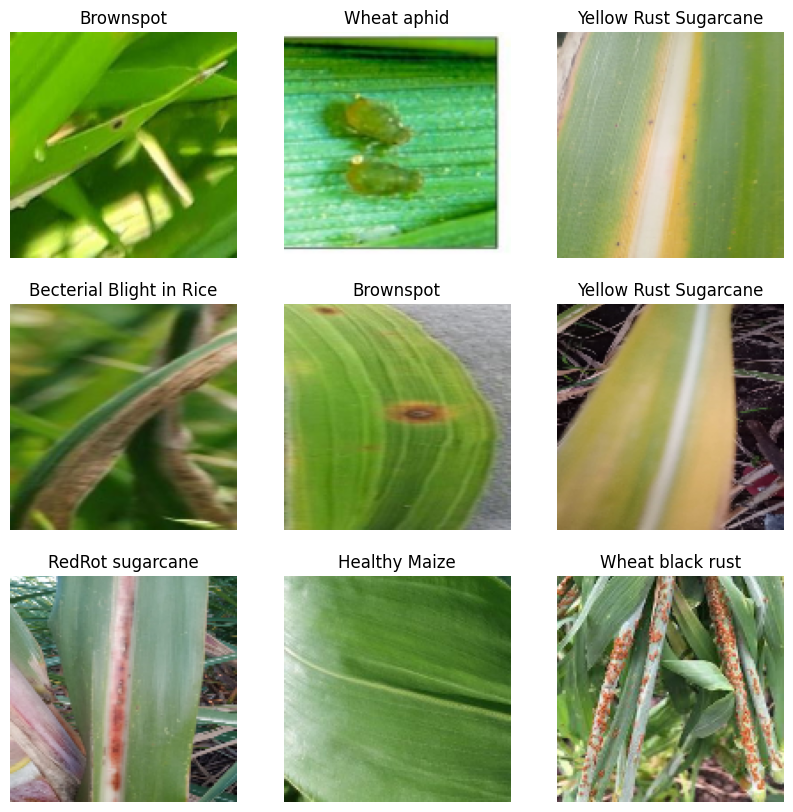

In [8]:
class_names = le.classes_
display_sample_images(images, labels_encoded.argmax(axis=1), class_names)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

In [10]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

In [11]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

model = Sequential()
model.add(vgg_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(categories), activation='softmax'))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
vgg_base.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [14]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

In [15]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=50,
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1732500725.815115      83 service.cc:145] XLA service 0x79510800da10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732500725.815175      83 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  3/293 ━━━━━━━━━━━━━━━━━━━━ 23s 80ms/step - accuracy: 0.0573 - loss: 4.3437    

I0000 00:00:1732500731.927369      83 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


293/293 ━━━━━━━━━━━━━━━━━━━━ 56s 164ms/step - accuracy: 0.3774 - loss: 2.5015 - val_accuracy: 0.6243 - val_loss: 1.3786 - learning_rate: 0.0010
Epoch 2/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 41s 136ms/step - accuracy: 0.5429 - loss: 1.6223 - val_accuracy: 0.6725 - val_loss: 1.1327 - learning_rate: 0.0010
Epoch 3/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 40s 133ms/step - accuracy: 0.5771 - loss: 1.4433 - val_accuracy: 0.7054 - val_loss: 1.0201 - learning_rate: 0.0010
Epoch 4/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 40s 133ms/step - accuracy: 0.5927 - loss: 1.3523 - val_accuracy: 0.7092 - val_loss: 0.9689 - learning_rate: 0.0010
Epoch 5/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 40s 133ms/step - accuracy: 0.6228 - loss: 1.2673 - val_accuracy: 0.7353 - val_loss: 0.9192 - learning_rate: 0.0010
Epoch 6/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 40s 133ms/step - accuracy: 0.6369 - loss: 1.2278 - val_accuracy: 0.7096 - val_loss: 0.9258 - learning_rate: 0.0010
Epoch 7/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 40s 132ms/step - accuracy: 0.6420 - loss:

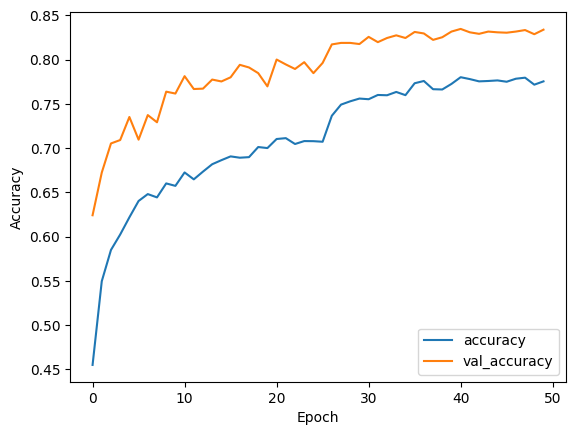

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [17]:
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.vgg16 import preprocess_input

# def load_and_preprocess_image(image_path): 
#     img = image.load_img(image_path, target_size=(128, 128)) 
#     img_array = image.img_to_array(img) 
#     img_array = np.expand_dims(img_array, axis=0) 
#     img_array = preprocess_input(img_array) 
#     return img_array

In [18]:
# img_url = '/kaggle/input/20k-multi-class-crop-disease-images/Train/American Bollworm on Cotton/Image_22.jpg'
# img_array = load_and_preprocess_image(img_url)

# predictions = model.predict(img_array)
# predicted_class = np.argmax(predictions, axis=1)
# predicted_class_index = [predicted_class]
# predicted_class_name = class_names[predicted_class_index[0]]

# print(f"Prediksi kelas: {predicted_class_name}")

### Model saved

In [23]:
!pip install tensorflowjs --upgrade --force-reinstall --no-cache-dir -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 24.8.3 requires cubinlinker, which is not installed.
cudf 24.8.3 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 24.8.3 requires ptxcompiler, which is not installed.
cuml 24.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 24.8.3 requires cupy-cuda11x>=12.0.0, which is not installed.
ucxx 0.39.1 requires libucx>=1.15.0, which is not installed.
apache-beam 2.46.0 requires cloudpickle~=2.2.1, but you have cloudpickle 3.0.0 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 2.0.2 which is incompatible.
apache-beam 2.46.0 requires protobuf<4,>3.12.2, but you have protobuf 5.28.3 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>

In [20]:
saved_model_path = "/kaggle/working/VGG16.h5"

# YOUR CODE HERE
model.save(saved_model_path)

In [24]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./

2024-11-25 02:49:33.494225: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732502973.522839     837 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732502973.531145     837 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [25]:
!zip molde_weight.zip *.bin model.json

  adding: group1-shard10of19.bin (deflated 7%)
  adding: group1-shard11of19.bin (deflated 7%)
  adding: group1-shard12of19.bin (deflated 7%)
  adding: group1-shard13of19.bin (deflated 7%)
  adding: group1-shard14of19.bin (deflated 7%)
  adding: group1-shard15of19.bin (deflated 7%)
  adding: group1-shard16of19.bin (deflated 7%)
  adding: group1-shard17of19.bin (deflated 7%)
  adding: group1-shard18of19.bin (deflated 7%)
  adding: group1-shard19of19.bin (deflated 7%)
  adding: group1-shard1of19.bin (deflated 7%)
  adding: group1-shard2of19.bin (deflated 7%)
  adding: group1-shard3of19.bin (deflated 7%)
  adding: group1-shard4of19.bin (deflated 7%)
  adding: group1-shard5of19.bin (deflated 7%)
  adding: group1-shard6of19.bin (deflated 7%)
  adding: group1-shard7of19.bin (deflated 7%)
  adding: group1-shard8of19.bin (deflated 7%)
  adding: group1-shard9of19.bin (deflated 7%)
  adding: model.json (deflated 91%)
